In [6]:
# Фунцкия качества хромосомы
def qZ(x,y):
    return (x + 3 * y) / (x ** 2 + y ** 2 + 1)

# Сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

# Схема обмена хромосомами 
def exScheme(oldX, oldY, sortedID):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    
    X[2] = oldX[sortedID[2]]
    X[3] = oldX[sortedID[2]]
    
    X[0] = oldX[sortedID[0]]
    X[1] = oldX[sortedID[1]]
    
    Y[0] = oldY[sortedID[2]]
    Y[1] = oldY[sortedID[2]]
    
    Y[2] = oldY[sortedID[0]]
    Y[3] = oldY[sortedID[1]]
    
    return X, Y

# Отсортируем массив качества наших потомков и выделим полученные индексы:
def sorting(Z):
    sortedID = sorted(range(len(Z)), key = lambda k: Z[k])
    
    return sortedID

# Функция для шага эволюции
def evoStep(X, Y, Z):
    _, minID = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    X.pop(minID)    
    Y.pop(minID)    
    Z.pop(minID)    
    
    return X, Y, Z

# Шаги эволюции (конечная ф-ия), по умолчанию 4 шага
def evoSteps(X, Y, stepsNum = 4):
    res = []
    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i,x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exScheme(X, Y, sorting(Z))
        res.append([X, Y, qSumZ(arrZ), arrZ])
    return X, Y, res

# Объявление массивов хромосом
X = [-5, -3, -2, -1]
Y = [-1, -2, 0 , 1]

# Реализация алгоритма
res = evoSteps(X, Y)

for i in range(len(res[2])):
    print(f'max_{i+1}_step:{res[2][i][2]}')
    
qualityArrZ = []
for i in range(len(res[2])):
    qualityArrZ += res[2][i][3]

print(f'Max_Z: {max(qualityArrZ)}')

max_1_step:-0.6724867724867726
max_2_step:-1.7407407407407407
max_3_step:0.35925925925925917
max_4_step:1.4259259259259258
Max_Z: 0.6666666666666666


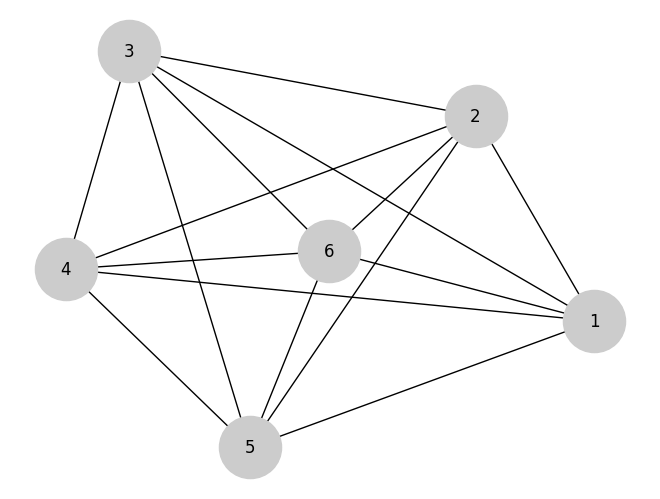

In [12]:
import networkx as nx
from math import e

# Длины рёбер
distances = [(1,2,22),
             (1,3,43),
             (1,4,39),
             (1,5,28),
             (1,6,20),
             (2,3,26),
             (2,4,33),
             (2,5,36),
             (2,6,17),
             (3,4,22),
             (3,5,40),
             (3,6,24),
             (4,5,22),
             (4,6,19),
             (5,6,20)]

# Последовательность прохождения маршрута
V = [1,3,4,5,6,2,1]

# Последовательность замен вершин
Z = [(2,4),
     (4,6),
     (3,5),
     (5,2)]

# Случайные числа, выпавшие в процессе счёта
P = [51,23,29,31]

# Начальная температура
T = 100

# Функция вероятности 
def prob(delta, T):
    return 100 * e ** (-delta / T) 

# Функция изменения температуры 
def reductTemp(prevT):
    return 0.5 * prevT

graph = nx.Graph() 
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color = '#ccc', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 5, 6, 2, 4, 3, 1]
 Длинна лучшего выбранного маршрута: 163
 Длины всех рассмотренных маршрутов: [146, 135, 167, 163, 194]


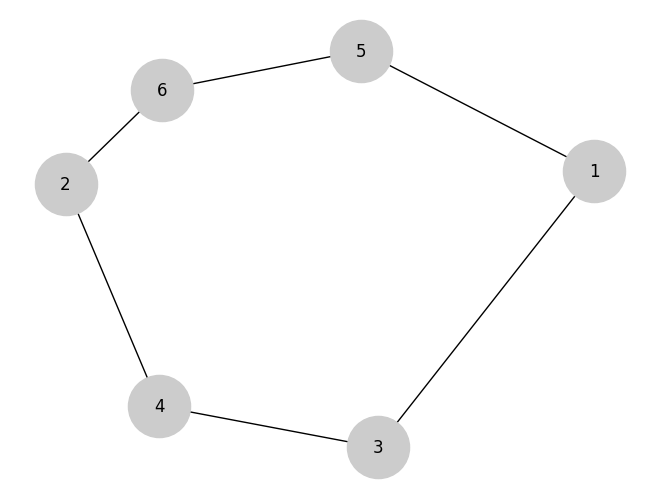

In [9]:
# Вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) 
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
    
# Вычисление длины маршрута
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))
    return sum(edges)

# Одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

# Перестановка в пути
def routeReplacment(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

# Выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин
    
    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов
        
        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = prob(deltaS, T) # подсчёт вероятности 
            
            # если заданная вероятность попадает в интервал от 0 до р, то новвый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        
        T = reductTemp(T) # вычисление температуры
        
    return V, arrSum

# Отрисовка графа  по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # Прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    graph = nx.Graph()
    
    graph.add_weighted_edges_from(newDistances) 

    nx.draw_kamada_kawai(graph, node_color = '#ccc', node_size = 2000, with_labels = True)
    
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}\n',
      f'Длинна лучшего выбранного маршрута: {routeLength(bestRoute, distances)}\n',
      f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute) # Отрисовка лучшего маршрута 